<a href="https://colab.research.google.com/github/narendra974/AIMLOPS_IISC/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical AI and MLOps : Assignment 1

## Import libraries and fetch data

In [2]:
## DO NOT EDIT
import numpy as np
import pickle
import matplotlib.pyplot as plt

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-4LzDDmpH-v9mIgwDqa6cSF5XrVm-SXg' -O linear_regression.pkl
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-AtCVwrcpgFCvAD3gwkUz812DIxqK338' -O logistic_regression.pkl

X1_train, X1_test, Y1_train, Y1_test, X2_train, X2_test, Y2_train, Y2_test = [[] for _ in range(8)]

with open("/content/linear_regression.pkl", 'rb') as f:
    X1_train, X1_test, Y1_train, Y1_test = pickle.load(f)

with open("/content/logistic_regression.pkl", 'rb') as f:
    X2_train, X2_test, Y2_train, Y2_test = pickle.load(f)

--2023-08-27 14:38:53--  https://docs.google.com/uc?export=download&id=1-4LzDDmpH-v9mIgwDqa6cSF5XrVm-SXg
Resolving docs.google.com (docs.google.com)... 142.251.111.113, 142.251.111.102, 142.251.111.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.111.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ioq46pnlmaqguhe5h7o98qfqc247cg5t/1693147125000/06549736550030827657/*/1-4LzDDmpH-v9mIgwDqa6cSF5XrVm-SXg?e=download&uuid=1d5a8594-db75-48e3-b25c-cf6b9430f30a [following]
--2023-08-27 14:38:54--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ioq46pnlmaqguhe5h7o98qfqc247cg5t/1693147125000/06549736550030827657/*/1-4LzDDmpH-v9mIgwDqa6cSF5XrVm-SXg?e=download&uuid=1d5a8594-db75-48e3-b25c-cf6b9430f30a
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 142.251.163.132, 2607:

In [3]:
print(X1_train.shape)
print(Y1_train.shape)
print(X1_test.shape)
print(Y1_test.shape)
print(X1_train[:5])
print(Y1_train[:5])

(70,)
(70,)
(30,)
(30,)
[-8.85376401 -2.5895495   8.08186325 -4.97550386  5.49334111]
[-624.50354913  -13.24869745  601.2775069  -103.3916406   201.44157479]


In [4]:
### Write your code here
## Solve the question using normal equation
print('X1_train : ', X1_train[0:4])
print('Y1_train : ', Y1_train[0:4])
x1_mean = np.sum(X1_train)
y1_mean = np.sum(Y1_train)
print('x1_mean : ', x1_mean)
print('y1_mean : ', y1_mean)
x_minus_xmean = X1_train - x1_mean
y_minus_ymean = Y1_train - y1_mean
print('x_minus_xmean : ', x_minus_xmean[0:4])
print('y_minus_ymean : ', y_minus_ymean[0:4])
multiply_x_minus_xmean_y_minus_ymean = np.multiply(x_minus_xmean, y_minus_ymean)
print('multiply_x_minus_xmean_y_minus_ymean : ', multiply_x_minus_xmean_y_minus_ymean[0:4])
sum_multiply_x_minus_xmean_y_minus_ymean = np.sum(multiply_x_minus_xmean_y_minus_ymean)
print('sum_multiply_x_minus_xmean_y_minus_ymean : ', sum_multiply_x_minus_xmean_y_minus_ymean)
x_minus_xmean_square = np.square(x_minus_xmean)
print('x_minus_xmean_square : ', x_minus_xmean_square[0:4])
sum_x_minus_xmean_square = np.sum(x_minus_xmean_square)
print('sum_x_minus_xmean_square : ', sum_x_minus_xmean_square)
slope = sum_multiply_x_minus_xmean_y_minus_ymean / sum_x_minus_xmean_square
print('slope : ', slope)
intercept = y1_mean - (slope * x1_mean)
print('intercept : ', intercept)
y_pred_forumla = (slope * X1_test) + intercept
print('y_pred_forumla : ',  y_pred_forumla[0:4])
y_minus_y_pred_forumla = Y1_test-y_pred_forumla
print('y_minus_y_pred_forumla : ',  y_minus_y_pred_forumla[0:4])
r_sqaure_formula = np.sum(np.square(y_minus_y_pred_forumla)) / np.sum(np.square(y_minus_ymean))
print('r_square_formula : ', r_sqaure_formula)

X1_train :  [-8.85376401 -2.5895495   8.08186325 -4.97550386]
Y1_train :  [-624.50354913  -13.24869745  601.2775069  -103.3916406 ]
x1_mean :  55.00686412713032
y1_mean :  6889.033503638221
x_minus_xmean :  [-63.86062814 -57.59641363 -46.92500088 -59.98236798]
y_minus_ymean :  [-7513.53705277 -6902.28220109 -6287.75599674 -6992.42514424]
multiply_x_minus_xmean_y_minus_ymean :  [479819.19575744 397546.70061624 295052.95568427 419422.21809021]
sum_multiply_x_minus_xmean_y_minus_ymean :  25943883.61525141
x_minus_xmean_square :  [4078.17982668 3317.34686256 2201.95570765 3597.88446876]
sum_x_minus_xmean_square :  208407.93004937872
slope :  124.48606734448371
intercept :  41.44531149941031
y_pred_forumla :  [  821.78731384  -675.11520111  -703.62117857 -1173.88518517]
y_minus_y_pred_forumla :  [-529.90855447  511.77225739  519.05888748  328.92455112]
r_square_formula :  0.001482118638354276


In [5]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X1_train.reshape(-1, 1), Y1_train)
print('regressor1.coef_ : ', regressor1.coef_)
print('regressor1.intercept_ : ', regressor1.intercept_)
y_pred_regressor = regressor1.predict(X1_test.reshape(-1, 1))
print('y_pred_regressor : ',  y_pred_regressor[0:4])
y_minus_y_pred_regressor = Y1_test-y_pred_regressor
print('y_minus_y_pred_regressor : ',  y_pred_regressor[0:4])
r_sqaure_regressor = np.sum(np.square(y_minus_y_pred_regressor)) / np.sum(np.square(y_minus_ymean))
print('r_square_regressor : ', r_sqaure_regressor)

regressor1.coef_ :  [65.15344921]
regressor1.intercept_ :  47.216379647623285
y_pred_regressor :  [ 455.6313461  -327.81666592 -342.73610867 -588.86262487]
y_minus_y_pred_regressor :  [ 455.6313461  -327.81666592 -342.73610867 -588.86262487]
r_square_regressor :  0.00038617751301733545


## Problem 1: Linear Regression (2 Marks)

Train a linear regression model for the above set of data. Use MSE(Mean Squared Error) as the loss function.

Print out the train accuracy and test accuracy.

**Data**: X1_train, X1_test, Y1_train, Y1_test

Linear Regression
Training Loss: starting  12165031.514552472
Training Loss: Ending  21663.553511182596
Testing Loss: starting  5909611.361592224
Testing Loss: Ending  12453.923220249473
slope :  62.27257858441942
intercept :  182.7445560329559


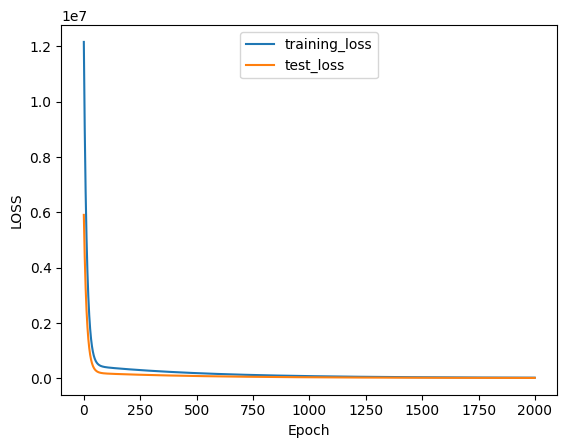

In [6]:
## Define the hypothesis function for linear regression

## Use linear regression to train the model
## Compute the training and testing loss
## Print the training and testing loss
## update the below two variables to print the model's loss

import random

def Cost_function(Y,Y_predicted, n):
  return (1 / (2 * n)) * np.sum((Y-Y_predicted)**2)

def DerErrorWithSlope(Y, Y_predicted, X, n):
    return (1 / n) * np.sum(-(Y - Y_predicted) * X)

def DerErroeWithBais(Y, Y_predicted, n):
     return (1 / n) * np.sum(-(Y - Y_predicted))

epoch = 2000
learning_rate = 0.001

slope =  random.randint(-1000, 1000)
intercept = random.randint(1000, 1000)
train_errors = []
test_errors = []

for i in range(epoch):
    Y1_train_predicted = slope * X1_train + intercept
    train_errors.append(Cost_function(Y1_train, Y1_train_predicted, 70))
    Y1_test_predicted = slope * X1_test + intercept
    test_errors.append(Cost_function(Y1_test, Y1_test_predicted, 70))
    dEWS = DerErrorWithSlope(Y1_train, Y1_train_predicted, X1_train, 70)
    dEWB = DerErroeWithBais(Y1_train, Y1_train_predicted, 70)
    slope = slope - learning_rate * dEWS
    intercept = intercept - learning_rate * dEWB
loss_train = train_errors
loss_test = test_errors

print("Linear Regression")
print("Training Loss: starting ", loss_train[0])
print("Training Loss: Ending ", loss_train[-1])
print("Testing Loss: starting ", loss_test[0])
print("Testing Loss: Ending ", loss_test[-1])
print("slope : ", slope)
print("intercept : ", intercept)

import matplotlib.pyplot as plt
# plt.plot(train_errors)
plt.xlabel("Epoch")
plt.ylabel("LOSS")
plt.plot(train_errors, label="training_loss")
plt.plot(test_errors, label="test_loss")
plt.legend(loc='upper center')
plt.show()

## Problem 2: Polynomial Regression (2 Marks)

Solve the above problem using atleast 3 different hypothesis functions with polynomial degree 2, 3 and 4.

Print out the train accuracy and test accuracy. Write your inference on the results.

**Data**: X1_train, X1_test, Y1_train, Y1_test

### Polynomial Degree 2

In [71]:
from pandas.core.algorithms import diff
from numpy.lib import polynomial

def transform_X_train(X, polynomial_degree):
  size = X.shape[0]
  features = polynomial_degree+1
  X_features = np.zeros(size * features).reshape(size, features)
  for i in range(features):
    X_features[:,features-i-1] = np.power(X, i)  ## generating the features X, X^2, ... and bais.
  return X_features

def predict(X, variables):
  return np.sum(np.matmul(X, variables))

def calculate_gradients(Y, Y_predicted, X):
  n = Y.shape[0]
  diff = -(Y.reshape(-1, 1) - Y_predicted)
  return (1 / n) * np.sum(np.multiply(diff, X), 0)

def compute_loss(Y,Y_predicted):
  n = Y.shape[0]
  return (1 / (2 * n)) * np.sum((Y-Y_predicted)**2)

def train(X1_train, X1_test, degree, epoch, learning_rate = 0.001):
  n = X1_train.shape[0]
  variables = np.random.random_sample(size = (degree+1, 1))
  X1_train_features = transform_X_train(X1_train, degree)
  X1_test_features = transform_X_train(X1_test, degree)
  train_errors = []
  test_errors = []

  for i in range(epoch):
    Y1_train_predicted = predict(X1_train_features, variables)
    train_errors.append(compute_loss(Y1_train, Y1_train_predicted))
    Y1_test_predicted = predict(X1_test_features, variables)
    test_errors.append(compute_loss(Y1_test, Y1_test_predicted))
    gradients = calculate_gradients(Y1_train, Y1_train_predicted, X1_train_features)
    variables = variables - (learning_rate * gradients.T.reshape(-1, 1))
  return variables, train_errors, test_errors

def draw(loss_train, loss_test):
  # plt.plot(train_errors)
  plt.xlabel("Epoch")
  plt.ylabel("LOSS")
  plt.plot(loss_train, label="training_loss")
  plt.plot(loss_test, label="test_loss")
  plt.legend(loc='upper center')
  return plt

# normalization of the data.
X1_train_normalized = X1_train / X1_train.max()
X1_test_normaized = X1_test / X1_train.max()

Polynomial Degree 2 Linear Regression
Training Loss: starting  92448.81743994876
Training Loss: Ending  92243.50497580582
Testing Loss: starting  131528.84502368496
Testing Loss: Ending  2922336.9467452606
variables :  [[ 227.32290421]
 [2430.72675112]
 [-278.51393261]]


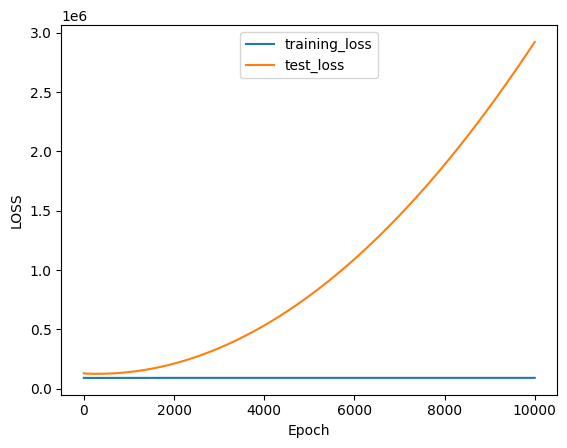

In [72]:
### Write your code here
## Define the hypothesis function
## Use polynomial regression to train the model
## Compute the training and testing loss

degree = 2
epoch = 10000
learning_rate = 0.001

variables, loss_train, loss_test = train(X1_train_normalized, X1_test_normaized, degree, epoch, learning_rate)

print("Polynomial Degree 2 Linear Regression")
print("Training Loss: starting ", loss_train[0])
print("Training Loss: Ending ", loss_train[-1])
print("Testing Loss: starting ", loss_test[0])
print("Testing Loss: Ending ", loss_test[-1])
print("variables : ", variables)

plot = draw(loss_train, loss_test)
plot.show()

### Polynomial Degree 3

Polynomial Degree 3 Linear Regression
Training Loss: starting  93990.9939435174
Training Loss: Ending  92556.28225133866
Testing Loss: starting  132865.16438506742
Testing Loss: Ending  6866888.836142673
variables :  [[1802.13336972]
 [ 190.99785494]
 [2423.15699689]
 [-374.0222656 ]]


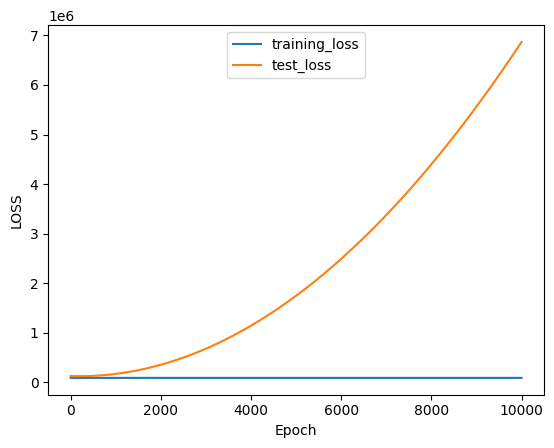

In [73]:
### Write your code here
## Define the hypothesis function
## Use polynomial regression to train the model
## Compute the training and testing loss
## Print the training and testing loss
## update the below two variables to print the model's loss

degree = 3
epoch = 10000
learning_rate = 0.001

variables, loss_train, loss_test = train(X1_train_normalized, X1_test_normaized, degree, epoch, learning_rate)

print("Polynomial Degree 3 Linear Regression")
print("Training Loss: starting ", loss_train[0])
print("Training Loss: Ending ", loss_train[-1])
print("Testing Loss: starting ", loss_test[0])
print("Testing Loss: Ending ", loss_test[-1])
print("variables : ", variables)

plot = draw(loss_train, loss_test)
plot.show()

### Polynomial Degree 4

In [ ]:
### Write your code here
## Define the hypothesis function



## Use polynomial regression to train the model



## Compute the training and testing loss



## Print the training and testing loss
## update the below two variables to print the model's loss
loss_train = 0
loss_test = 0

print("Polynomial Degree 4")
print("Training Loss: ", loss_train)
print("Testing  Loss: ", loss_test)

Polynomial Degree 4
Training Accuracy:  0
Testing  Accuracy:  0


### Inference

*Write your inference here*

...

## Problem 3: Overfitting and Underfitting (2 Marks)

**Let us say we have a dataset with little noise. Then a model is underfitting when:**

a) both the train and test errors are high

b) train error is low but test error is high

c) train error is high but the test error is low

d) both train and test errors are low


**If we choose the parameters of a model to get the best overfitting/underfitting tradeoff, we will always get a zero test error.**

a) True

b) False


**State which of the below statements is false with respect to underfitting vs overfitting.**

a) If the training set performance is roughly equal, underfitting is generally better.

b) An underfit model is simpler and can usually be improved by looking at where it fits badly.

c) An overfit model is often easier to change because it is easy to know where to start simplifying.

d) Neither overfitting nor underfitting is desirable.


In [ ]:
## Write your answers below




## Problem 4: Regularization (2 Marks)

Solve the problem using regularization (Lasso, Ridge and Elastic net) on the 3 polynomial functions defined in **Problem 2**.

Print out the train and test accuracy. Write your inference on the results

**Data**: X1_train, X1_test, Y1_train, Y1_test


### Polynomial Degree 2

#### Lasso Regularization

In [ ]:
### Write your code here
## Define a new hypothesis function by adding a Lasso regularizer
## to the 2nd order hypothesis function that you defined earlier



## Use polynomial regression to train the model



## Compute the training and testing accuracy



## Print the training and testing accuracy
## update the below two variables to print the model's accuracy
accuracy_train = 0
accuracy_test = 0

print("Polynomial Degree 2 : Lasso Regularization")
print("Training Accuracy: ", accuracy_train)
print("Testing  Accuracy: ", accuracy_test)

Polynomial Degree 2 : Lasso Regularization
Training Accuracy:  0
Testing  Accuracy:  0


#### Ridge Regularization

In [ ]:
### Write your code here
## Define a new hypothesis function by adding a Ridge regularizer
## to the 2nd order hypothesis function that you defined earlier



## Use polynomial regression to train the model



## Compute the training and testing accuracy



## Print the training and testing accuracy
## update the below two variables to print the model's accuracy
accuracy_train = 0
accuracy_test = 0

print("Polynomial Degree 2 : Ridge Regularization")
print("Training Accuracy: ", accuracy_train)
print("Testing  Accuracy: ", accuracy_test)

Polynomial Degree 2 : Ridge Regularization
Training Accuracy:  0
Testing  Accuracy:  0


#### Elastic net Regularization

In [ ]:
### Write your code here
## Define a new hypothesis function by adding a Elastic net regularizer
## to the 2nd order hypothesis function that you defined earlier



## Use polynomial regression to train the model



## Compute the training and testing accuracy



## Print the training and testing accuracy
## update the below two variables to print the model's accuracy
accuracy_train = 0
accuracy_test = 0

print("Polynomial Degree 2 : Elastic net Regularization")
print("Training Accuracy: ", accuracy_train)
print("Testing  Accuracy: ", accuracy_test)

Polynomial Degree 2 : Elastic net Regularization
Training Accuracy:  0
Testing  Accuracy:  0


### Polynomial Degree 3

---



#### Lasso Regularization

In [ ]:
### Write your code here
## Define a new hypothesis function by adding a Lasso regularizer
## to the 3rd order hypothesis function that you defined earlier



## Use polynomial regression to train the model



## Compute the training and testing accuracy



## Print the training and testing accuracy
## update the below two variables to print the model's accuracy
accuracy_train = 0
accuracy_test = 0

print("Polynomial Degree 3 : Lasso Regularization")
print("Training Accuracy: ", accuracy_train)
print("Testing  Accuracy: ", accuracy_test)

Polynomial Degree 3 : Lasso Regularization
Training Accuracy:  0
Testing  Accuracy:  0


#### Ridge Regularization

In [ ]:
### Write your code here
## Define a new hypothesis function by adding a Ridge regularizer
## to the 3rd order hypothesis function that you defined earlier



## Use polynomial regression to train the model



## Compute the training and testing accuracy



## Print the training and testing accuracy
## update the below two variables to print the model's accuracy
accuracy_train = 0
accuracy_test = 0

print("Polynomial Degree 3 : Ridge Regularization")
print("Training Accuracy: ", accuracy_train)
print("Testing  Accuracy: ", accuracy_test)

Polynomial Degree 3 : Ridge Regularization
Training Accuracy:  0
Testing  Accuracy:  0


#### Elastic net Regularization

In [ ]:
### Write your code here
## Define a new hypothesis function by adding a Elastic net regularizer
## to the 3rd order hypothesis function that you defined earlier



## Use polynomial regression to train the model



## Compute the training and testing accuracy



## Print the training and testing accuracy
## update the below two variables to print the model's accuracy
accuracy_train = 0
accuracy_test = 0

print("Polynomial Degree 3 : Elastic net Regularization")
print("Training Accuracy: ", accuracy_train)
print("Testing  Accuracy: ", accuracy_test)

Polynomial Degree 3 : Elastic net Regularization
Training Accuracy:  0
Testing  Accuracy:  0


### Polynomial Degree 4

#### Lasso Regularization

In [ ]:
### Write your code here
## Define a new hypothesis function by adding a Lasso regularizer
## to the 4th order hypothesis function that you defined earlier



## Use polynomial regression to train the model



## Compute the training and testing accuracy



## Print the training and testing accuracy
## update the below two variables to print the model's accuracy
accuracy_train = 0
accuracy_test = 0

print("Polynomial Degree 4 : Lasso Regularization")
print("Training Accuracy: ", accuracy_train)
print("Testing  Accuracy: ", accuracy_test)

Polynomial Degree 4 : Lasso Regularization
Training Accuracy:  0
Testing  Accuracy:  0


#### Ridge Regularization

In [ ]:
### Write your code here
## Define a new hypothesis function by adding a Ridge regularizer
## to the 4th order hypothesis function that you defined earlier



## Use polynomial regression to train the model



## Compute the training and testing accuracy



## Print the training and testing accuracy
## update the below two variables to print the model's accuracy
accuracy_train = 0
accuracy_test = 0

print("Polynomial Degree 4 : Ridge Regularization")
print("Training Accuracy: ", accuracy_train)
print("Testing  Accuracy: ", accuracy_test)

Polynomial Degree 4 : Ridge Regularization
Training Accuracy:  0
Testing  Accuracy:  0


#### Elastic net Regularization

In [ ]:
### Write your code here
## Define a new hypothesis function by adding a Elastic net regularizer
## to the 4th order hypothesis function that you defined earlier



## Use polynomial regression to train the model



## Compute the training and testing accuracy



## Print the training and testing accuracy
## update the below two variables to print the model's accuracy
accuracy_train = 0
accuracy_test = 0

print("Polynomial Degree 4 : Elastic net Regularization")
print("Training Accuracy: ", accuracy_train)
print("Testing  Accuracy: ", accuracy_test)

Polynomial Degree 4 : Elastic net Regularization
Training Accuracy:  0
Testing  Accuracy:  0


### Inference

*Write your inference here*

...

## Problem 5: Logistic Regression (2 Marks)

Train a logistic regression model.
Print the F1 score, accuracy and confusion matrix for both training and testing.

**Data**: X2_train, X2_test, Y2_train, Y2_test

In [ ]:
### Write your code here



## Compute f1 score, accuracy and confusion matrix for both training and testing



## Print the above computed metrics
accuracy_train = 0
f1_train = 0
cf_train = [] # confusion matrix
accuracy_test = 0
f1_test = 0
cf_test = [] # confusion matrix


print("Logistic Regression")
print("Training Accuracy: ", accuracy_train)
print("Training F1 score: ", f1_train)
print("Training confusion matrix: ")
print(cf_train)

print("Testing  Accuracy: ", accuracy_test)
print("Testing  F1 score: ", f1_test)
print("Testing  confusion matrix: ")
print(cf_test)